# StatsModels의 Kalman Filter 클래스

statsmodels 버전 0.8.1 이상은 상태 공간 모형(space state model)을 위한 statespace 서브패키지내에 동적 선형 모형(DLM: Dynamic Linear Model) 칼만 필터링을 위한 `KalmanFilter` 클래스와 `FilterResults` 클래스를 제공한다. 여기에서는 이 클래스의 사용법을 간단히 소개한다. 보다 자세한 내용은 문서 웹사이트를 참조한다.

* http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.KalmanFilter.html
* http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.FilterResults.html

이 두 클래스는 모두 `statsmodels.tsa.statespace.representation.Representation` 클래스를 상속한다.

* http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.representation.Representation.html

## 클래스 임포트

`KalmanFilter`는 버전 0.8.1인 현재 아직 statsmodel.api 서브패키지에 노출되어 있지 않다. 따라서 다음과 같이 직접 클래스를 임포트 해야한다. `FilterResults` 클래스는 필터링 결과로 나오는 것이므로 별도로 임포트할 필요가 없다.

In [2]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

## 클래스 생성

KalmanFilter 클래스는 다음과 같은 동적 선형 모형 수식을 가정하고 있다.

$$
\begin{eqnarray}
\alpha_t  &=& T_t \alpha_{t-1} + c_t + R_t \eta_t \\
y_t       &=& Z_t \alpha_t + d_t + \varepsilon_t \\
\end{eqnarray}
$$

* $\alpha_t$ : 상태 벡터
* $T$ : transition matrix
* $c$ : state intercept vector
* $R$ : selection matrix
* $\eta_t\sim N(0, Q_t) $ : 이노베이션 과정 벡터
* $Q$ : state covariance matrix


* $y_t$ : 관측 벡터
* $Z$ : design matrix
* $d$ : observation intercept vector
* $\varepsilon_t \sim N(0, H_t)$ : 관측 잡음 벡터
* $H$ : observation covariance matrix


클래스 생성을 위한 입력 인수 목록은 다음과 같다.

| 인수 | 용도 |
|-|-|
|  `k_endog`  | 정수 혹은 배열. 배열인 경우에는 칼만필터를 적용할 실제 시계열 자료. 정수인 경우에는 출력 변수의 수 |
|  `k_states`  | 정수. 상태 변수의 수 |
|  `k_posdef`  | (옵션) 정수. 출력 잡음의 공분산 중 양 한정(positive definite)을 보장하는 차원의 수. 디폴트는 k_states. |
|  `transition`  | (옵션) 상태 전이 행렬(transition matrix). 디폴트는 0.  |
|  `state_intercept`  | (옵션) 상태 전이식의 절편(intercept for the transition equation). 디폴트는 0.  |
|  `selection` | (옵션) 이노베이션 과정에 대한 선택 행렬(selection matrix). 디폴트는 0.   |
|  `state_cov`  | (옵션) 이노베이션 과정의 공분산 행렬. 디폴트는 0.   |
|  `design`  | (옵션) 설계 행렬(design matrix). 디폴트는 0. |
|  `obs_intercept`  | (옵션) 관측식의 절편(intercept for the observation equation). 디폴트는 0. |
|  `obs_cov`  | (옵션) 관측 행렬의 공분산 행렬. 디폴트는 0. |
|  `initial_state`  | (옵션) 배열. 초기 상태 변수 값 |
|  `initialization`  | (옵션) 다음 문자열 중 하나 {`approximate_diffuse`, `stationary`, `known`} (옵션) 상태 변수 초기화 방법 |
|  `initial_variance`  | (옵션) 실수. 초기화 방법이 `approximate_diffuse` 일 경우의 초기 분산 값. 디폴트는 1e6. |
|  `initial_state_cov`  | (옵션) 배열. 초기화 방법이 `known` 일 경우 사용하는 분산 행렬 |
|  `nobs`  | (옵션) 정수. `k_endog`가 정수인 경우에 시계열 자료의 길이를 표시. |
|  `loglikelihood_burn`  | (옵션) 정수. log-likelihood를 기록하지 않는 burn-in 구간의 길이. 디폴트는 0 |
|  `tolerance`  | (옵션) 실수. 상태변수의 수렴 기준. 디폴트는 1e-19. |


예를 들어 다음과 같은 로컬 레벨 모형의 경우,

$$
\begin{eqnarray}
\mu_t &=& \mu_{t-1} + w_t &,\;\;\; & w_t \sim N(0, 10) \\
Y_{t} &=& \mu_{t} + v_t &,\;\;\; & v_t \sim {N}(0, 100) \\
\end{eqnarray}
$$

다음 코드와 같이 모형을 생성할 수 있다.

In [91]:
mod1 = KalmanFilter(k_endog=1, k_states=1,
                    transition=[[1]], selection=[[1]], state_cov=[[10]], 
                    design=[[1]], obs_cov=[[100]])
mod1

In [5]:
np.random.seed(0)
y1, x1 = mod1.simulate(100)

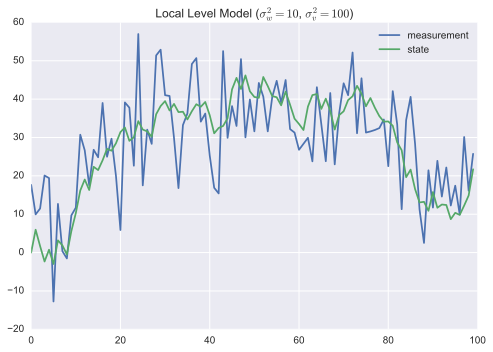

In [7]:
plt.plot(y1, label="measurement")
plt.plot(x1, label="state")
plt.legend()
plt.title("Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
plt.show()

만약 시뮬레이션이 아니라 실제 시계열을 필터링 하는 것이 목적이라면 다음과 같이 관측된 시계열을 넣어 모형을 생성한다.

In [104]:
mod2 = KalmanFilter(y1, k_states=1,
                    transition=[[1]], selection=[[1]], state_cov=[[10]], 
                    design=[[1]], obs_cov=[[100]])
mod2

## 속성

`KalmanFilter` 클래스틑 다음과 같은 속성을 가진다.


| 속성 | 자료형 | 의미 |
|-|-|-|
| `dtype` | `numpy.dtype` | 자료형 |
| `obs` | 배열  |  관측 시계열의 값 | 	
| `endog` |  배열 | 관측 시계열의 값 |
| `time_invariant` | 불리언 | 상태 모형 모수들이 시간에 따라 변화하는가의 여부 | 
| `design` | 배열  | 입력시 지정값 | 	 
| `obs_cov` |  배열 | 입력시 지정값 | 	 
| `obs_intercept` | 배열  | 입력시 지정값 | 	 
| `selection` | 배열 | 입력시 지정값 | 	 
| `state_cov` | 배열  | 입력시 지정값 | 	 
| `state_intercept` | 배열  | 입력시 지정값 | 	 
| `transition` | 배열  | 입력시 지정값 | 	 

## 메서드

`KalmanFilter` 클래스에서 많이 사용되는 메서드 목록은 다음과 같다.


| 메서드 | 기능 |
|-|-|
| `simulate` | 모수가 모두 충족된 경우 시뮬레이션 수행 |
| `initialize_known` | 초기 상태 생성 (상태값을 아는 경우) |
| `initialize_stationary` | 초기 상태 생성 (정상 상태) |
| `initialize_approximate_diffuse` | 초기 상태 생성 |
| `filter` | 필터링.  `FilterResults` 객체 출력 |


시뮬레이션 방법은 위에서 보였다. 필터링의 경우에는 `filter` 메서드를 실행하기에 앞서 `initialize_xxxx` 메소드들로 초기 상태를 생성해야 한다.

In [106]:
mod2.initialize_known([0], [[1]])
res2 = mod2.filter()
res2

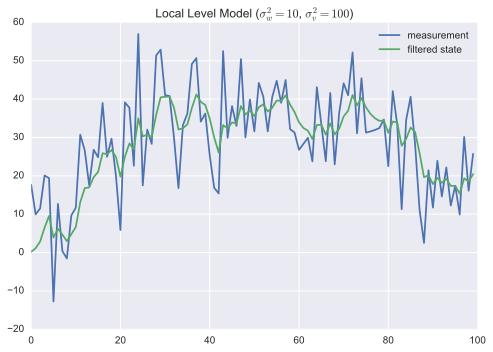

In [109]:
plt.plot(mod2.obs[0], label="measurement")
plt.plot(res2.filtered_state[0], label="filtered state")
plt.legend()
plt.title("Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
plt.show()